# Predicting The Costs Of Used Cars

The data science skills can help you predict the price of a used car based on a given set of features discussed below.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
#from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [2]:
train = pd.read_csv("Data_Train#.csv")
test = pd.read_csv("Data_Test#.csv")

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
train.shape

(6019, 13)

In [6]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [9]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

# Data Cleaning of Power

In [10]:
a=[]
for i in train['Power']:
    a.append(str(i).split(' ')[0])

In [11]:
train['Power']=a

In [78]:
train['Power']=train['Power'].replace('null',np.nan)

In [79]:
train['Power']=train['Power'].fillna(train['Power'].median())

In [14]:
train['Power'].isnull().sum()

0

In [15]:
train['Power']=train['Power'].astype('float64')

In [16]:
z=[]
for i in test['Power']:
    z.append(str(i).split(' ')[0])

## test['Power']=z

In [80]:
test['Power']=test['Power'].replace('null',np.nan)

In [81]:
test['Power']=test['Power'].fillna(test['Power'].median())

In [20]:
test['Power'].isnull().sum()

0

In [21]:
test['Power']=test['Power'].astype('float64')

# Data cleaning of Engine

In [22]:
train['Engine']=train['Engine'].replace('null',np.nan)

In [23]:
train['Engine'].isnull().sum()

36

In [24]:
train['Engine'] = train['Engine'].fillna(train['Engine'].mode()[0])

In [25]:
train['Engine'] = train.Engine.str.replace('CC', '').astype(float)

In [26]:
test['Engine']=test['Engine'].replace('null',np.nan)

In [27]:
test['Engine'].isnull().sum()

10

In [28]:
test['Engine'] = test['Engine'].fillna(test['Engine'].mode()[0])

In [29]:
test['Engine'] = test.Engine.str.replace('CC', '').astype(float)

# Data cleaning of Seat Colmun

In [30]:
train.Seats.isnull().sum()

42

In [31]:
train.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [32]:
train.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [33]:
train.Seats.describe()

count    5977.000000
mean        5.278735
std         0.808840
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [34]:
train['Seats']=train['Seats'].fillna(train['Seats'].mode()[0])

In [35]:
test['Seats']=test['Seats'].fillna(test['Seats'].mode()[0])

# Data cleaning of Mileage Colmun

In [36]:
train.Mileage.isnull().sum()

2

In [37]:
f=[]
for i in train['Mileage']:
    f.append (str(i).split(' ')[0])

In [38]:
train['Mileage']=f

In [39]:
train['Mileage'] = train.Mileage.astype(float)

In [40]:
train['Mileage'] = train['Mileage'].fillna(train['Mileage'].median())

In [41]:
e=[]
for i in test['Mileage']:
    e.append (str(i).split(' ')[0])

In [42]:
test['Mileage']=e

In [43]:
test['Mileage'] = test.Mileage.astype(float)

In [44]:
test['Mileage'] = test['Mileage'].fillna(test['Mileage'].median())

# Cleaning data of Name column

In [45]:
names = list(train.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
train["Brand"] =  brand
train["Model"] = model
train.drop(labels = ['Name'], axis = 1, inplace = True)


In [46]:
names = list(test.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
test["Brand"] =  brand
test["Model"] = model
test.drop(labels = ['Name'], axis = 1, inplace = True)


In [47]:
train.drop(labels = ['New_Price'], axis = 1, inplace = True)
test.drop(labels = ['New_Price'], axis = 1, inplace = True)

# Re-ordering Data-set

In [48]:
train= train[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
test= test[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [49]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [50]:
test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,93.70,5.0
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [51]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in Brand 31
Unique values in Model 1876
Unique values in Location 11
Unique values in Year 22
Unique values in Kilometers_Driven 3093
Unique values in Fuel_Type 5
Unique values in Transmission 2
Unique values in Owner_Type 4
Unique values in Mileage 430
Unique values in Engine 146
Unique values in Power 369
Unique values in Seats 9
Unique values in Price 1373


In [52]:
for i in test.columns:
    print("Unique values in", i, test[i].nunique())

Unique values in Brand 29
Unique values in Model 768
Unique values in Location 11
Unique values in Year 20
Unique values in Kilometers_Driven 755
Unique values in Fuel_Type 4
Unique values in Transmission 2
Unique values in Owner_Type 4
Unique values in Mileage 298
Unique values in Engine 104
Unique values in Power 247
Unique values in Seats 7


In [53]:
train.isnull().sum()

Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                 0
Price                 0
dtype: int64

In [54]:
test.isnull().sum()

Brand                 0
Model                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                10
Seats                 0
dtype: int64

In [55]:
train.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Bentley             1
Isuzu               1
Lamborghini         1
Smart               1
Name: Brand, dtype: int64

In [56]:
train.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [57]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [58]:
train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [59]:
train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [60]:
train.Seats.value_counts()

5.0     5056
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [61]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [62]:
df1 = train.copy() 
df1['Age_of_car'] = '2019'
df1['Age_of_car'] = pd.to_datetime(df1['Age_of_car'],format='%Y')
df1['Year'] = pd.to_datetime(df1['Year'],format='%Y')
df1['Age_of_car'] = (df1['Age_of_car'] - df1['Year']).dt.days
train['Age_of_car'] = df1['Age_of_car']

df2 = test.copy() 
df2['Age_of_car'] = '2019'
df2['Age_of_car'] = pd.to_datetime(df2['Age_of_car'],format='%Y')
df2['Year'] = pd.to_datetime(df2['Year'],format='%Y')
df2['Age_of_car'] = (df2['Age_of_car'] - df2['Year']).dt.days
test['Age_of_car'] = df2['Age_of_car']

del df1, df2
train.drop(['Year'], axis=1, inplace=True)
test.drop(['Year'], axis=1, inplace=True)

In [63]:
market = {'Maruti' : 45.5,
'Hyundai'  :    11.5,
'Honda' :     4.5,
'Toyota'    :  3.5,
'Mercedes-Benz' :  2.4,
'Volkswagen':   3.6,
'Ford'    :   2.5,
'Mahindra' : 5.5,
'BMW'   :      1.6,
'Audi'    :  2,
'Tata'  :      5.5,
'Skoda'       : 2,
'Renault'  :   1.8,
'Chevrolet' :   1.5,
'Nissan':   1,
'Land'    : 1,
'Jaguar'      :1,
'Fiat'  :    0.6,
'Mitsubishi'  : 0.5,
'Mini':      0.5,
'Volvo'    :   0.5,
'Porsche' :  0.2,
'Jeep'  :    0.3,
'Datsun' :  0.3,
'Force'  :      0.1,
'ISUZU'  :    0.1,
'Smart'  :      0.1,
'Lamborghini'  :  0.1,
'Ambassador'  :   0.1,
'Isuzu' :  0.1,
'Bentley': 0.1
}
train['Market_Share'] = train['Brand'].map(market)
train['Market_Share']=train['Market_Share'].replace('null',np.nan)
train['Market_Share']=train['Market_Share'].fillna(train['Market_Share'].median())


test['Market_Share'] = test['Brand'].map(market)
test['Market_Share']=test['Market_Share'].replace('null',np.nan)
test['Market_Share']=test['Market_Share'].fillna(test['Market_Share'].median())

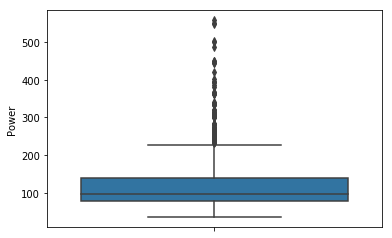

In [64]:
sns.boxplot( y=train["Power"] )
plt.show()

In [65]:
train.Power.describe()

count    5983.000000
mean      112.974899
std        53.430733
min        34.200000
25%        77.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [66]:
def get_power(Power):

    
    if (Power >=250  and Power < 600):
        return 'High Power'
    elif (Power >= 100 and Power < 250):
        return 'Medium Power'
    elif (Power >= 0 and Power < 100):
        return 'Low Power'
    
train['Car_Power'] = train['Power'].apply(get_power)
train['Car_Power']=train['Car_Power'].replace('null',np.nan)
train['Car_Power']=train['Car_Power'].fillna(train['Car_Power'].mode()[0])


test['Car_Power'] = test['Power'].apply(get_power) 
test['Car_Power']=test['Car_Power'].replace('null',np.nan)
test['Car_Power']=test['Car_Power'].fillna(test['Car_Power'].mode()[0])


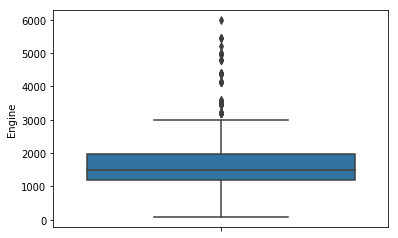

In [67]:
sns.boxplot( y=train["Engine"] )
plt.show()

In [68]:
train.Engine.describe()

count    6019.000000
mean     1618.738827
std       600.445858
min        72.000000
25%      1197.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

In [69]:
def get_engine(Engine):

    
    if (Engine >=3000  and Engine < 6000):
        return 'High Engine'
    elif (Engine >= 1500 and Engine < 3000):
        return 'Medium Engine'
    elif (Engine >= 0 and Engine < 1500):
        return 'Low Engine'
    
train['Car_Engine'] = train['Engine'].apply(get_engine)   
test['Car_Engine'] = test['Engine'].apply(get_engine) 

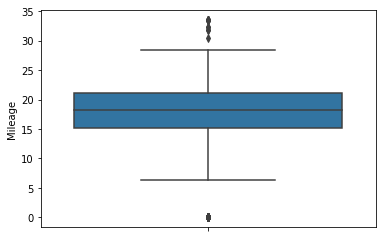

In [70]:
sns.boxplot( y=train["Mileage"] )
plt.show()

In [71]:
train.Mileage.describe()

count    6019.000000
mean       18.134966
std         4.581528
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [72]:
def get_mileage(Mileage):

    
    if (Mileage >=24  and Mileage < 40):
        return 'Best Mileage'
    elif (Mileage >= 12 and Mileage < 24):
        return 'Economy Mileage'
    elif (Mileage >= 0 and Mileage < 12):
        return 'Least Mileage'
    
train['Car_Mileage'] = train['Mileage'].apply(get_mileage)   
test['Car_Mileage'] = test['Mileage'].apply(get_mileage) 

In [73]:
def get_Kilometers(Kilometers_Driven):

    
    if (Kilometers_Driven >=300000  and Kilometers_Driven < 800000):
        return 'High Driven'
    elif (Kilometers_Driven >= 100000 and Kilometers_Driven < 300000):
        return 'Medium Driven'
    elif (Kilometers_Driven >= 40000 and Kilometers_Driven < 100000):
        return 'Minimum Driven'
    elif (Kilometers_Driven >= 1 and Kilometers_Driven < 40000):
        return 'Least Driven'
    
train['Car_Driven'] = train['Kilometers_Driven'].apply(get_Kilometers)
train['Car_Driven']=train['Car_Driven'].replace('null',np.nan)
train['Car_Driven']=train['Car_Driven'].fillna(train['Car_Driven'].mode()[0])


test['Car_Driven'] = test['Kilometers_Driven'].apply(get_Kilometers) 
test['Car_Driven']=test['Car_Driven'].replace('null',np.nan)
test['Car_Driven']=test['Car_Driven'].fillna(test['Car_Driven'].mode()[0])


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 18 columns):
Brand                6019 non-null object
Model                6019 non-null object
Location             6019 non-null object
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                5983 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
Age_of_car           6019 non-null int64
Market_Share         6019 non-null float64
Car_Power            6019 non-null object
Car_Engine           6019 non-null object
Car_Mileage          6019 non-null object
Car_Driven           6019 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 846.5+ KB


In [82]:
train.isnull().sum()

Brand                0
Model                0
Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age_of_car           0
Market_Share         0
Car_Power            0
Car_Engine           0
Car_Mileage          0
Car_Driven           0
dtype: int64

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 17 columns):
Brand                1234 non-null object
Model                1234 non-null object
Location             1234 non-null object
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1234 non-null float64
Seats                1234 non-null float64
Age_of_car           1234 non-null int64
Market_Share         1234 non-null float64
Car_Power            1234 non-null object
Car_Engine           1234 non-null object
Car_Mileage          1234 non-null object
Car_Driven           1234 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 164.0+ KB


In [84]:
test.isnull().sum()

Brand                0
Model                0
Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Age_of_car           0
Market_Share         0
Car_Power            0
Car_Engine           0
Car_Mileage          0
Car_Driven           0
dtype: int64

In [86]:
train_df = pd.get_dummies(train, columns=['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage','Car_Mileage', 'Engine','Car_Engine', 'Power','Car_Power', 'Seats','Car_Driven'],drop_first=True)
test_df = pd.get_dummies(test, columns=['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage','Car_Mileage', 'Engine','Car_Engine', 'Power','Car_Power', 'Seats','Car_Driven'],drop_first=True)

In [87]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

In [88]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4213, 2885), (4213,), (1806, 2885), (1806,))

In [89]:

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Users\Vedika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vedika\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vedika\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [90]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [91]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)



param = {'objective':'regression','num_leaves':80,
                              'learning_rate':0.1, 'n_estimators':100,
                              'max_bin' : 30, 'bagging_fraction' : 0.8,
                              'bagging_freq' : 9, 'feature_fraction' :0.129,
                              'feature_fraction_seed':9, 'bagging_seed':9,
                              'min_data_in_leaf' :3, 'min_sum_hessian_in_leaf' : 6, 'random_state':10}
lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred1 = lgbm.predict(x_test)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred1))))

C:\Users\Vedika\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE: 3.7627544461736164


In [93]:

for col in train_df.columns:
    if col not in test_df.columns:
        missing_cols_test.append(col)
        
for i in missing_cols_test:
    test_df[i] = 0

test_df.drop('Price', axis=1, inplace=True)

In [94]:
missing_cols_test = []
for col in test_df.columns:
    if col not in train_df.columns:
        missing_cols_test.append(col)
        
for i in missing_cols_test:
    train_df[i] = 0


In [95]:
train_df = train_df.reindex(sorted(train_df.columns), axis=1)
test_df = test_df.reindex(sorted(test_df.columns), axis=1)

In [96]:
train_df.shape, test_df.shape

((6019, 3075), (1234, 3074))

In [97]:
X_train = train_df.drop(labels='Price', axis=1)
y_train = train_df['Price'].values

X_test = test_df

In [98]:
X_train.shape, X_test.shape

((6019, 3074), (1234, 3074))

In [99]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)



param = {'objective':'regression','num_leaves':80,
                              'learning_rate':0.1, 'n_estimators':100,
                              'max_bin' : 30, 'bagging_fraction' : 0.8,
                              'bagging_freq' : 9, 'feature_fraction' :0.129,
                              'feature_fraction_seed':9, 'bagging_seed':9,
                              'min_data_in_leaf' :3, 'min_sum_hessian_in_leaf' : 6, 'random_state':10}
lgbm = lgb.train(params=param,
                 train_set=train_data)

y_pred2 = lgbm.predict(X_test)

C:\Users\Vedika\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [100]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate =0.1, 
      n_estimators=500, max_depth=7, min_child_weight=1,gamma=0, reg_alpha=0,
      subsample=0.99,colsample_bytree=0.5,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [103]:
y_pred = y_pred1*0.50 + y_pred2*0.50

In [96]:
y_pred

array([ 6.65169393,  6.01048714,  2.60127267, ...,  2.55034575,
       30.69467022,  2.76341374])